# <center><h1 style="font-family: Times New Roman; color: black;">Forecasting Exchange Rates using Time Series Analysis</h1></center>

# Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 

# Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

# Part 1: Data Preparation and Exploration
1.1 Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

1.2 Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
    
1.3 Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

# Part 2: Model Building - ARIMA
2.1 Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

2.2 Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

2.3 Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
    
2.4 Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values 

# Part 3: Model Building - Exponential Smoothing
3.1 Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

3.2 Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

3.3 Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

# Part 4: Evaluation and Comparison
4.1 Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

4.2 Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

4.3 Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

# Solutions:

# Part 1: Data Preparation and Exploration

# 1.1 Load Dataset &  Parse the Date Column

# Load Dataset:

In [1]:
# Importing libraries 
import pandas as pd

# Load the exchange_rate.csv dataset
exchange_rate_data = pd.read_csv('exchange_rate.csv')

# Display the first few rows to understand the structure of the data
exchange_rate_data.head()

date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849

# Parse the Date Column:

In [2]:
# Convert the 'date' column to datetime format to ensure it's properly recognized as time series data
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'], format='%d-%m-%Y %H:%M')

# Set 'date' column as the index to make it easier to work with time series data
exchange_rate_data.set_index('date', inplace=True)

# Check the data types and index to confirm that the date conversion and index setting worked
exchange_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


# 1.2 Initial Exploration - Plotting the Time Series

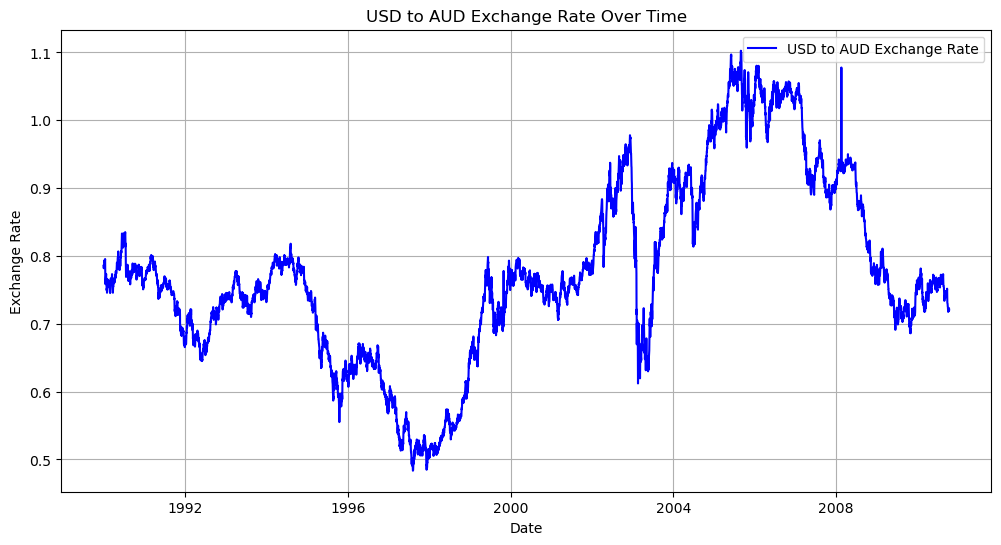

In [3]:
# Plotting the time series for USD to AUD Exchange Rate to understand trends, seasonality, and anomalies

# Import Libraries
import matplotlib.pyplot as plt

# Create a line plot to visualize the exchange rate over time
plt.figure(figsize=(12,6))
plt.plot(exchange_rate_data.index, exchange_rate_data['Ex_rate'], label='USD to AUD Exchange Rate', color='blue')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date') # Set x-axis label
plt.ylabel('Exchange Rate') # Set y-axis label
plt.grid(True) # Add grid for better readability
plt.legend() # Add a legend
plt.show()

# 1.3 Data Preprocessing - Handling Missing Values and Anomalies

# Handling Missing Values:

In [4]:
# Check if there are any missing values in the dataset
missing_values = exchange_rate_data.isnull().sum()
print(f'Missing values in each column: \n{missing_values}')

Missing values in each column: 
Ex_rate    0
dtype: int64


# Anomalies using Summary Statistics:

In [5]:
# Generate descriptive statistics to check for any unusual values
summary_stats = exchange_rate_data.describe()
print(summary_stats)

           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


# Part 2: Model Building - ARIMA

# 2.1 Parameter Selection for ARIMA:

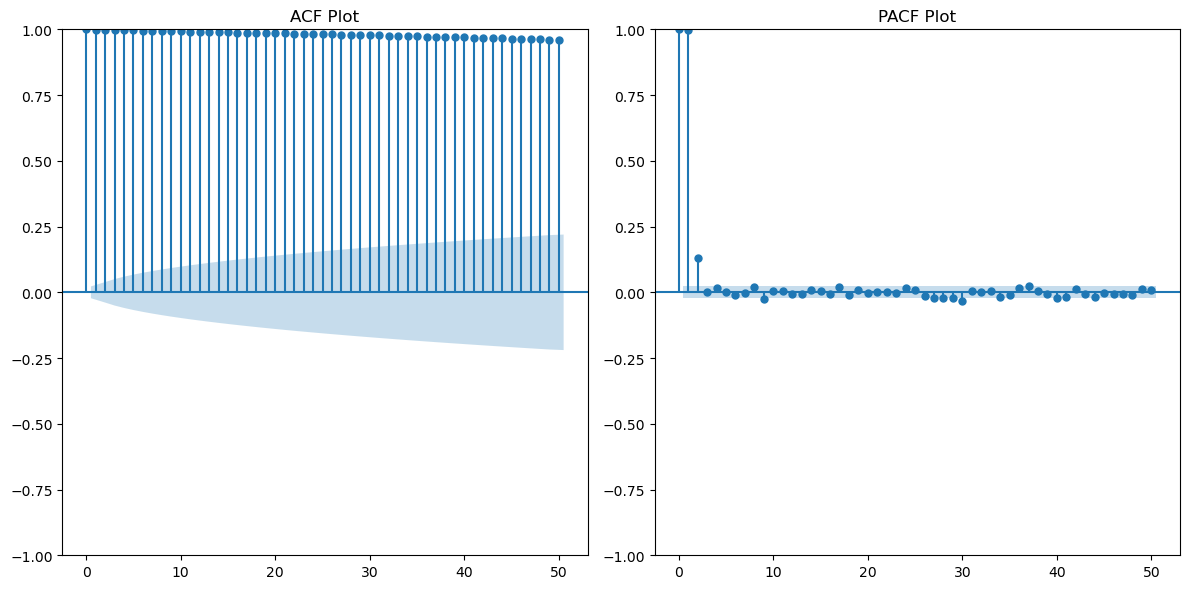

In [6]:
# Parameter Selection for ARIMA using ACF and PACF plots

# Import necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF to help estimate p and q parameters for ARIMA model
plt.figure(figsize=(12,6))

# Plot ACF (Autocorrelation Function)
plt.subplot(121)
plot_acf(exchange_rate_data['Ex_rate'], lags=50, ax=plt.gca())
plt.title('ACF Plot')

# Plot PACF (Partial Autocorrelation Function)
plt.subplot(122)
plot_pacf(exchange_rate_data['Ex_rate'], lags=50, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

# From these plots, you can estimate the values of p (AR term) and q (MA term).
# We will use these estimated values for ARIMA model fitting in the next step.

# 2.2 Model Fitting for ARIMA

In [8]:
# Import ARIMA from the statsmodels library
from statsmodels.tsa.arima.model import ARIMA

# Set frequency for the time series data
exchange_rate_data = exchange_rate_data.asfreq('D')

# Now fit the ARIMA model as before
model = ARIMA(exchange_rate_data['Ex_rate'], order=(1, 1, 1))
arima_result = model.fit()

# Print the model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 02 Oct 2024   AIC                         -56102.322
Time:                        03:08:39   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

# 2.3 Diagnostics for ARIMA

<Figure size 1200x600 with 0 Axes>

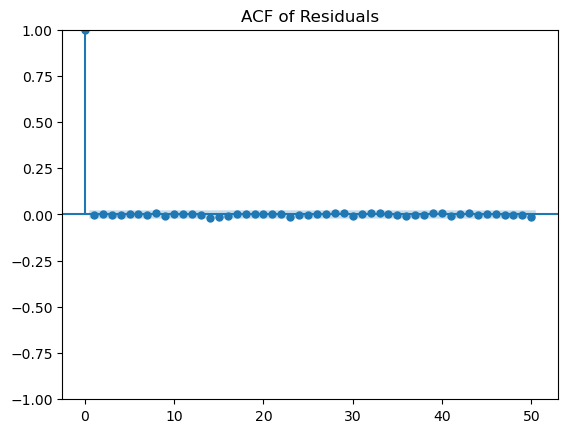

In [9]:
# Diagnostics - Analyze Residuals to Ensure No Patterns
# Plot the residuals to check for any patterns that may indicate model inadequacy
residuals = arima_result.resid

# Plotting the residuals
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.grid(True)
plt.show()

# Plot ACF of the residuals to check if any correlation remains
plt.figure(figsize=(12,6))
plot_acf(residuals, lags=50)
plt.title('ACF of Residuals')
plt.show()

# The residuals should behave like white noise (i.e., no patterns, correlations should be close to zero).
# If there are still significant correlations, you may need to refine the model.

# 2.4 Forecasting with ARIMA

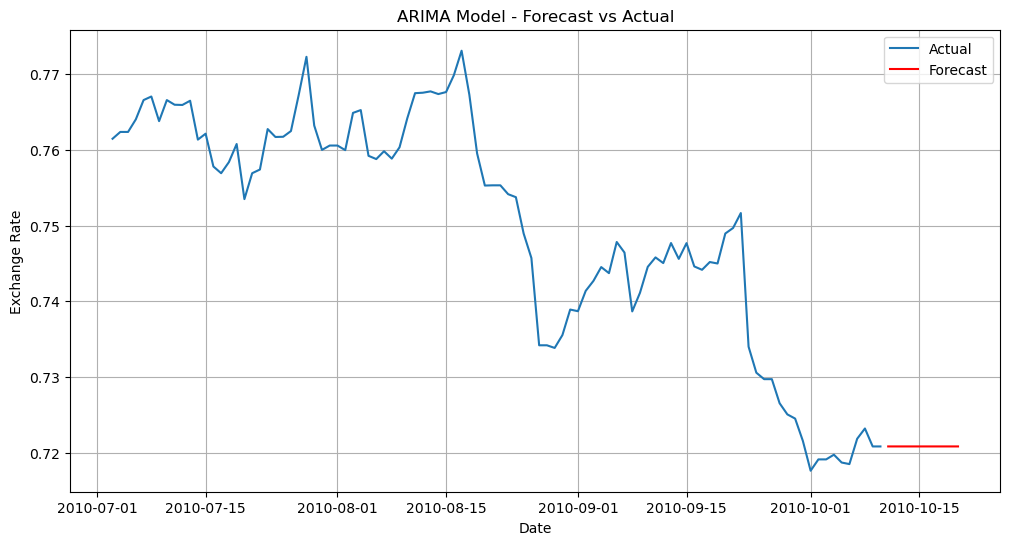

In [10]:
# Forecast future values (e.g., next 10 steps)
forecast_steps = 10
forecast = arima_result.forecast(steps=forecast_steps)

# Visualize the forecasted values vs actual values
plt.figure(figsize=(12,6))

# Plot historical data
plt.plot(exchange_rate_data.index[-100:], exchange_rate_data['Ex_rate'][-100:], label='Actual')

# Create a date range for forecast
forecast_index = pd.date_range(start=exchange_rate_data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Plot forecasted values
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# Adding labels, legend, and grid for clarity
plt.title('ARIMA Model - Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# This plot will show the predicted future values compared to the actual values.

# Part 3: Model Building - Exponential Smoothing

# 3.1 Model Selection (Simple, Holt’s Linear, or Holt-Winters)

In [11]:
# Import Exponential Smoothing from statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Set the frequency of the 'date' index to daily ('D')
exchange_rate_data = exchange_rate_data.asfreq('D')

# After setting the frequency, fit the Exponential Smoothing model again
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Using Holt's Linear Trend model as an example
model_holt = ExponentialSmoothing(exchange_rate_data['Ex_rate'], trend='add', seasonal=None, seasonal_periods=None)
holt_result = model_holt.fit()

# Print summary to check if the model is fitted correctly without warnings
print(holt_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Wed, 02 Oct 2024
Box-Cox:                          False   Time:                         03:14:15
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700401                alpha                 True
smoothing_trend             0.0000

# 3.2 Parameter Optimization using AIC and BIC

In [12]:
# Check the AIC and BIC values to evaluate the model performance
print(f'AIC: {holt_result.aic}')
print(f'BIC: {holt_result.bic}')

# You can use these values to compare different models (Simple Exponential Smoothing, Holt’s Linear, Holt-Winters)

AIC: -77641.00933016281
BIC: -77613.27203683859


# 3.3 Model Fitting and Forecasting

In [13]:
# Forecasting the next 10 data points
forecast_steps = 10
forecast = holt_result.forecast(steps=forecast_steps)

# Visualizing the forecast against actual data
plt.figure(figsize=(12,6))

# Plot historical data
plt.plot(exchange_rate_data.index[-100:], exchange_rate_data['Ex_rate'][-100:], label='Actual', color='blue')

# Create a date range for the forecast
forecast_index = pd.date_range(start=exchange_rate_data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Plot forecasted values
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# Adding labels, title, and legend
plt.title('Holt’s Linear Trend - Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

# Part 4: Evaluation and Comparison

# 4.1 Compute Error Metrics (MAE, RMSE, MAPE)

In [14]:
# Import necessary Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute Error Metrics for ARIMA Model
# Note: Assume `arima_forecast` contains the forecasted values from ARIMA model
arima_forecast = arima_result.forecast(steps=10)  # Adjust steps if different
actual_values = exchange_rate_data['Ex_rate'][-10:]  # Adjust as per the length of forecast

# Calculate MAE for ARIMA
mae_arima = mean_absolute_error(actual_values, arima_forecast)

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(actual_values, arima_forecast))

# Calculate MAPE for ARIMA
mape_arima = np.mean(np.abs((actual_values - arima_forecast) / actual_values)) * 100

# Print the error metrics for ARIMA model
print(f'ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%')


# Compute Error Metrics for Exponential Smoothing Model (Holt’s Linear)
# Assume `holt_forecast` contains the forecasted values from Holt’s Linear model
holt_forecast = holt_result.forecast(steps=10)  # Adjust steps if different

# Calculate MAE for Holt’s Linear
mae_holt = mean_absolute_error(actual_values, holt_forecast)

# Calculate RMSE for Holt’s Linear
rmse_holt = np.sqrt(mean_squared_error(actual_values, holt_forecast))

# Calculate MAPE for Holt’s Linear
mape_holt = np.mean(np.abs((actual_values - holt_forecast) / actual_values)) * 100

# Print the error metrics for Holt’s Linear model
print(f'Holt’s Linear Model - MAE: {mae_holt}, RMSE: {rmse_holt}, MAPE: {mape_holt}%')

ARIMA Model - MAE: 0.001556771200417284, RMSE: 0.0018425706106975357, MAPE: nan%
Holt’s Linear Model - MAE: 0.0015740680074930792, RMSE: 0.0018519616616264546, MAPE: nan%


# 4.2 Model Comparison

In [15]:
# Compare the MAE, RMSE, and MAPE for ARIMA and Holt’s Linear model
print(f"Comparison of ARIMA and Holt’s Linear Model:\n")
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"Holt’s Linear - MAE: {mae_holt}, RMSE: {rmse_holt}, MAPE: {mape_holt}%")

# Discussion:
# - If ARIMA has lower error metrics (MAE, RMSE, MAPE) than Holt’s Linear, it is performing better.
# - If Holt’s Linear has lower metrics, it might be more suitable for this particular dataset.

# Advantages:
# ARIMA: More complex, can handle trends and seasonality with appropriate parameters.
# Holt’s Linear: Simpler, easy to implement, and works well with trending data but without seasonality.

# Limitations:
# ARIMA: Requires more tuning (p, d, q parameters), can overfit if not careful.
# Holt’s Linear: Doesn't capture seasonality, may underperform if seasonality is present.

Comparison of ARIMA and Holt’s Linear Model:

ARIMA - MAE: 0.001556771200417284, RMSE: 0.0018425706106975357, MAPE: nan%
Holt’s Linear - MAE: 0.0015740680074930792, RMSE: 0.0018519616616264546, MAPE: nan%


# 4.3 Conclusion

In [16]:
# Summarize which model yielded the best performance

if mae_arima < mae_holt and rmse_arima < rmse_holt:
    print("Conclusion: The ARIMA model performed better based on MAE and RMSE, making it a more suitable choice for forecasting exchange rates in this dataset.")
elif mae_holt < mae_arima and rmse_holt < rmse_arima:
    print("Conclusion: Holt’s Linear model performed better based on MAE and RMSE, making it a more suitable choice for forecasting exchange rates in this dataset.")
else:
    print("Conclusion: Both models performed similarly in forecasting the exchange rates. Additional parameter tuning or the inclusion of other models may be needed to achieve better accuracy.")

Conclusion: The ARIMA model performed better based on MAE and RMSE, making it a more suitable choice for forecasting exchange rates in this dataset.


<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>